# Technical Notebook for ProxLib: Book Recommendation System

## Project Overview

During the Covid-19 pandemic, businesses of all sizes found themselves needing to pivot how they operated on a daily basis. This was especially true for those that did not have an e-commerce presence. 

This book recommendation system is a proof of concept to encourage the new businesses that have launched online to incorporate a rating and recommender system.



## Business Understanding

How can reviews improve sales? How are our customers making choices on what items to buy? 
Choice is the act of picking or deciding between two or more possibilities. 
But how about when there are sometimes hundreds of thousands of possibilities? From Amazon to Netflix to Yelp, we have seen businesses capitalize and address this choice overload by providing recommendations to their customers.

The Covid-19 pandemic has shown a pivot by businesses of all sizes across many industries. When local farmers stoped making deliveries to local restaurants that were shut down during shelter in place and grocery stores were being emptied out by panicked consumers, the farmers saw an opening. They set up systems to deliver to homes rather than restaurants. Many did not have a website before, but now do. Businesses have pivoted to include e-commerce. For example, this [local farmer](https://martinsfarmtotable.com/about/) writes "When the pandemic lockdowns hit, I decided to sell direct to you, the home cook. And you, in this precarious moment in time, need to have good, healthy ingredients to make food at home. **My goal is to both keep my farm alive and nourish you and your community**."  And according to the [Harvard Business Review(HBR)](https://hbr.org/2020/07/how-businesses-have-successfully-pivoted-during-the-pandemic), this is one of the successful conditions of a business pivot--"Pivoting is a lateral move that creates enough value for the customer and the firm to share." This farmer is providing something that the consumer needs(fresh food), in a way that will keep their buisness going. They are providing this service by making it easier on the consumer, as well as themselves to track orders, by building an online ordering service. This is just one example.  What are the consequences for operating in "business as usual" terms in a new normal?  HBR tells us that, "it does weed out business models that fail to pivot toward the new reality." Not only during pandemics, but business models are having to adapt and change to different realities as they grow, as time changes.


[Michael Schrage](http://ide.mit.edu/about-us/people/michael-schrage), visiting fellow at the MIT Sloan School of Management’s Initiative on the Digital Economy, book is quoted in [Strategy+Business magazine](https://www.strategy-business.com/article/What-people-like-you-like?gko=d2e94) as saying that about **30% of e-commerce revenues around the world come from recommendations.**  



## Data Understanding

In this section I go through how to obtain the data, what features are in the dataset, and why these are important for the business problem.




#### Obtaining the Data

See data/scrape/final/scrapping.ipynb for the functions and code used to scrape the data.

I opted for scrapping the data because the datasets available with similar data were oudated and did not have features such as text reviews, page length, or genre-- features that I wanted to have available for a phase 2 of this project which includes content based filtering. 

I was not able to use the Goodreads API because they did not provide one that enabled me to get the data that I needed--books connected to individual ratings, the ratings in the APIs availalble were aggregates.


#### Data Properties

As mentioned above, the dataset set includes several features including book title, author name, page length, ratings, users, and text ratings.  For the purposes of this phase 1 of the project, the focus will be on book, user, and rating.

Book and user id's were strings that will be converted into numerical form, rating is already in integer type.

Having an accurate recommendation system will be important because want customers to trust the recommendation system so that they continue to use it in the future. 

## Data Preparation

In this section I share some of the process that I went through to prepare the data and the libraries used for the rest of the notebook.

#### Import Libraries

The following cell has the libraries needed to perform the operations in this notebook

In [1]:
import pandas as pd

import numpy as np

# from matplotlib import pyplot as plt
# %matplotlib inline
# import seaborn as sns

# import os

# from sklearn.preprocessing import LabelEncoder

In [2]:
from pyspark.sql import SparkSession
# from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.ml.recommendation import ALS

# from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# import pyspark

from pyspark.sql.functions import isnan, when, count, col, explode
from pyspark.sql.types import *

#### Import Dataset

As mentioned in the previous section, this dataset is a combination of the multiple tables that were exported during the web scrapping process. 

In [3]:
df = pd.read_csv('../../data/final/comb_df.csv')

#### Inspect Dataset

This is an initial inspection of the data to see what is available. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157332 entries, 0 to 157331
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             157332 non-null  object 
 1   title             157332 non-null  object 
 2   author            157332 non-null  object 
 3   pages             157332 non-null  object 
 4   unique_key        157332 non-null  object 
 5   average_rating    157332 non-null  float64
 6   book_description  109970 non-null  object 
 7   user_name         157332 non-null  object 
 8   user_unique_key   157332 non-null  object 
 9   number_of_stars   157332 non-null  int64  
 10  book_unique_key   157332 non-null  object 
 11  review_text       154800 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 14.4+ MB


In [4]:
df.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,https://www.goodreads.com/user/show/33397902-k...,5,https://www.goodreads.com/book/show/50358085-t...,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,https://www.goodreads.com/user/show/90604449-d...,5,https://www.goodreads.com/book/show/50358085-t...,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),https://www.goodreads.com/user/show/7515832-ja...,0,https://www.goodreads.com/book/show/50358085-t...,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,https://www.goodreads.com/user/show/5907077-ad...,5,https://www.goodreads.com/book/show/50358085-t...,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,https://www.goodreads.com/user/show/3433933-mo...,0,https://www.goodreads.com/book/show/50358085-t...,"This is a hefty read, but it’s one that can be..."


In [5]:
df.shape

(157332, 12)

In [6]:
# looking to see how many unique books there are in dataset

df['book_unique_key'].nunique()

484

In [7]:
# looking to see how many authors are represented in dataset
df['author'].nunique()

415

In [8]:
# looking to see how many reviewers there are in dataset
df['user_unique_key'].nunique()

28959

In [11]:
# looking to see how many duplicates are are, which are expected. This number is inclusive of original and duplicate. 
df.duplicated(subset='user_unique_key',keep=False).sum()

143642

#### Data Preprocessing

Because my scrapper took reviews based on books found on a specific genre's page, there were duplicates between the book ratings because they may have been classified under multiple genres--such as one book falling into fiction, historical fiction, and history genres.

During the data cleaning process I:
- combined the multiple genre book and reviews table to make one combined data frame (see notebooks/exploratory/merge_tables.ipynb for merging multiple tables into one dataset)
- took out the duplicate data left by the scrapping
- removed extraneous text
- removed text in mixed data type columns, such as the word "pages" from the pages columns so that column could be an integer data type

In [4]:
# replace book unique key link with unique numerical

enc = LabelEncoder()
enc.fit(df['book_unique_key'])
df['book_unique_key'] = enc.transform(df['book_unique_key'])
comb_df2 = df

In [13]:
comb_df2.tail()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
157327,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,ｄａｎｉｅｌａ,https://www.goodreads.com/user/show/69098728,4,105,This was honestly so much fun! I enjoyed this ...
157328,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Kyla Harris,https://www.goodreads.com/user/show/27881731-k...,4,105,Plot - 16/20\nCharacters - 16/20\nCreativity -...
157329,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Sara,https://www.goodreads.com/user/show/69932312-sara,4,105,I love this Universe!\nThis is a really great ...
157330,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Alaina,https://www.goodreads.com/user/show/50620706-a...,5,105,"“Powdered donuts,"" Tyson said earnestly. ""I wi..."
157331,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Vanessa J.,https://www.goodreads.com/user/show/19590155-v...,3,105,"3.5 out of 5 stars\n\nDear Percy Jackson fans,..."


In [5]:
# replace user unique key link with unique numerical

enc = LabelEncoder()
enc.fit(comb_df2['user_unique_key'])
comb_df2['user_unique_key'] = enc.transform(comb_df2['user_unique_key'])
comb_df3 = comb_df2
comb_df3.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [6]:
# remove extraneous text in author column

comb_df3['author'] = comb_df3['author'].replace({'by ': '', "(Goodreads Author)": ''}, regex=True)
comb_df4= comb_df3
comb_df4.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [7]:
# remove extraneous text in pages column

comb_df4['pages'] = comb_df4['pages'].replace({'pages': ''}, regex=True)
comb_df5= comb_df4
comb_df5.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [8]:
# remove unnessary columns
# dropping unique_key column because it is a duplicate of book unique key
# dropping user_name column because user_unique_key serves the same purpose and 
# addresses any similarities there may be within user names

comb_df6= comb_df5.drop(['unique_key', 'user_name'], axis= 1)
comb_df6.head() 


,genre,title,author,pages,average_rating,book_description,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [9]:
# dropping duplicate entries

comb_df7= comb_df6.drop_duplicates(subset=['user_unique_key', 'book_unique_key'], keep='first')
comb_df7.head()

,genre,title,author,pages,average_rating,book_description,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12531,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,27474,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,24616,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,20526,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12873,0,287,"This is a hefty read, but it’s one that can be..."


In [10]:
# remove ratings with "0" stars because these represent readers who wrote a review but did not give it a rating.
# for the moment, we are only interested in readers who gave it a rating. Ratings are from 1-5 stars.

comb_df8= comb_df7[comb_df7.number_of_stars != 0]

In [29]:
comb_df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55079 entries, 0 to 157121
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             55079 non-null  object 
 1   title             55079 non-null  object 
 2   author            55079 non-null  object 
 3   pages             55079 non-null  object 
 4   average_rating    55079 non-null  float64
 5   book_description  41148 non-null  object 
 6   user_unique_key   55079 non-null  int64  
 7   number_of_stars   55079 non-null  int64  
 8   book_unique_key   55079 non-null  int64  
 9   review_text       54016 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 4.6+ MB


##### From the summary above we see that are some missing values in some of the columns. For this stage of the project, it is fine to leave them as is. For this first phase I am intersted in having a book_unique_key and number_of_stars that are not empty. If I were to remove the empty rows based on null values in book_description and review_text, I would lose rows wit valid data for this first phase.  Removing these missing values can be done during the second phase of the project when more data is added to the overall dataset.

In [2]:
df_pd= pd.read_csv('../../data/final/comb_df_clean.csv')

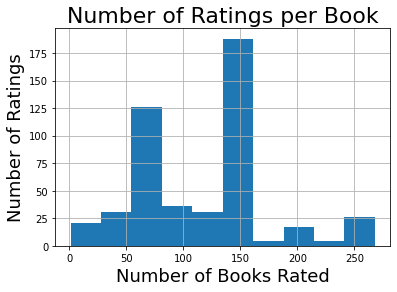

In [3]:
# look at ratings distribution 

ratings_num=df_pd.groupby('book_unique_key')['number_of_stars'].count().sort_values(ascending= False)

plt.hist(ratings_num, bins= 10);
plt.xlabel('Number of Books Rated', size = 18)
plt.ylabel('Number of Ratings', size= 18)
plt.title('Number of Ratings per Book', size= 22)
plt.grid(True)
plt.savefig('../../reports/Visualizations/book_ratings.png', dpi= 300)

plt.show()

In [69]:
#["#f2f61f", "#e3f625", "#d5f62b"]
hex_colors = ["#eb5e68", "#ec5e7a", "#e4649d", "#d171bc", "#b580d4",
            "#669ae9", "#35a4e5", "#00abd9", "#00afc8", "#17b1bf"]
colors = sns.color_palette(hex_colors)

In [70]:
#sns.hist(ratings_num, bins = 10)

sns.distplot(ratings_num, hist= True, kde=False, bins= 3, palette= colors)
plt.tick_params(labelsize = 10)



TypeError: distplot() got an unexpected keyword argument 'palette'

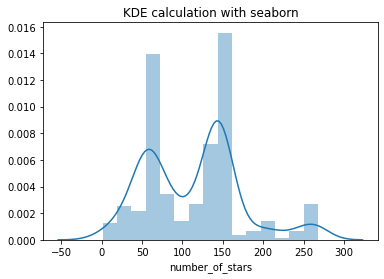

In [7]:
sns.distplot(ratings_num,hist=True,bins=15);
plt.title("KDE calculation with seaborn");

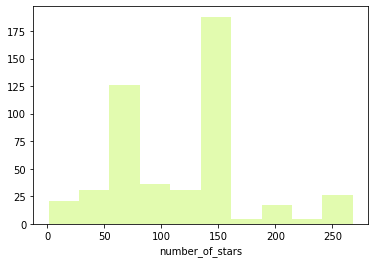

In [62]:
#sns.hist(ratings_num, bins = 10)

sns.distplot(ratings_num, hist= True, kde=False, bins= 10, color = "#b8f637")
plt.tick_params(labelsize = 10)



In [44]:
# saving cleaned data to import it into a spark dataframe for modeling
# could use dataframe without saving to external csv, but I wanted to save a copy of clean data for future processing

comb_df8.to_csv('../../data/final/comb_df_clean.csv', index=False)


## Modeling

In [4]:
# initiate a spark session

spark = SparkSession.builder.master('local[*]').appName('capstone').getOrCreate()

In [3]:
#import the clean dataset

df_pd= pd.read_csv('../../data/final/comb_df_clean.csv')


In [12]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55079 entries, 0 to 55078
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             55079 non-null  object 
 1   title             55079 non-null  object 
 2   author            55079 non-null  object 
 3   pages             55079 non-null  int64  
 4   average_rating    55079 non-null  float64
 5   book_description  41148 non-null  object 
 6   user_unique_key   55079 non-null  int64  
 7   number_of_stars   55079 non-null  int64  
 8   book_unique_key   55079 non-null  int64  
 9   review_text       54016 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.2+ MB


In [5]:
# set a schema to let spark know what data types to import the columns as from the csv

schema = StructType([StructField("genre", StringType(), True),StructField("title", StringType(), True), 
                     StructField("author", StringType(), True), StructField("pages", IntegerType(), True), 
                     StructField("average_rating", FloatType(), True), StructField("book_description", StringType(), True), 
                     StructField("user_unique_key", IntegerType(), True),StructField("number_of_stars", IntegerType(), True), 
                     StructField("book_unique_key", IntegerType(), True), StructField("review_text", StringType(), True)])

df_sp = spark.createDataFrame(df_pd, schema=schema)

In [9]:
df_sp.printSchema()

root
 |-- genre: string (nullable = true)
 |-- title: string (nullable = true)
 |-- author: string (nullable = true)
 |-- pages: integer (nullable = true)
 |-- average_rating: float (nullable = true)
 |-- book_description: string (nullable = true)
 |-- user_unique_key: integer (nullable = true)
 |-- number_of_stars: integer (nullable = true)
 |-- book_unique_key: integer (nullable = true)
 |-- review_text: string (nullable = true)



In [5]:
# spark's ALS works well with sparce matrices
# checking sparcity

stars_num= df_sp.select("number_of_stars").count()


users = df_sp.select("user_unique_key").distinct().count()
books = df_sp.select("book_unique_key").distinct().count()


denominator = users * books


sparsity = (1.0 - (stars_num *1.0)/denominator)*100
print("The ratings dataframe is ", "%.2f" % sparsity + "% empty.")

The ratings dataframe is  99.60% empty.


#### First Simple Model(FSM)

In [6]:
# split dataset into 80 % train, and 20% test
# there are no x/y splits because ALS needs to see the whole matrix to learn and fill in the missing values

train, test = df_sp.randomSplit([0.8, 0.2], seed= 2020)

In [12]:
als = ALS(userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop')


model_fsm = als.fit(train)


In [13]:
predictions = model_fsm.transform(test)

In [14]:
# using RMSE and MAE to see evaluation of model

evaluator = RegressionEvaluator(metricName='rmse', labelCol='number_of_stars',
                                predictionCol='prediction')
evaluator2 = RegressionEvaluator(metricName='mae', labelCol='number_of_stars',
                                predictionCol='prediction')

In [15]:
rmse = evaluator.evaluate(predictions)
print('The RMSE is= ' + str(rmse))

The RMSE is= 1.5439266624623944


In [16]:
mae = evaluator2.evaluate(predictions)
print('The MAE is = ' + str(mae))

The MAE is = 1.191968248377123


1.5 RMSE is high.  For the next model, I am adding some additional parameters.  In the FSM, the default maxIter and rank is 10. So for this next model, I want to test numbers under 10 for both. 

In [17]:
als2 = ALS(maxIter=5,rank=4, 
          userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop', seed= 2020)


model_2 = als2.fit(train)
predictions2 = model_2.transform(test)
#predictions2.show()

+----------------+--------------------+-----------+-----+--------------+--------------------+---------------+---------------+---------------+--------------------+----------+
|           genre|               title|     author|pages|average_rating|    book_description|user_unique_key|number_of_stars|book_unique_key|         review_text|prediction|
+----------------+--------------------+-----------+-----+--------------+--------------------+---------------+---------------+---------------+--------------------+----------+
|biography-memoir|This Is Going to ...|Adam Kay ()|  256|          4.41|Welcome to the li...|           4799|              2|            148|DNF @ 40%

Standa...|  4.881459|
|biography-memoir|This Is Going to ...|Adam Kay ()|  256|          4.41|Welcome to the li...|          13665|              4|            148|I've worked with ...|-0.8096077|
|biography-memoir|This Is Going to ...|Adam Kay ()|  256|          4.41|Welcome to the li...|          16608|              5|     

In [18]:
rmse2 = evaluator.evaluate(predictions2)
print('The RMSE for Model 2 is= ' + str(rmse2))

The RMSE for Model 2 is= 2.192373988194588


In [19]:
mae2 = evaluator2.evaluate(predictions2)
print('The MAE for Model 2 is = ' + str(mae2))

The MAE for Model 2 is = 1.5325654366137673


Model 2 did worse than the first model. So I will try and put the number higher than the default value for maxIter.

In [20]:
als3 = ALS(maxIter=15,rank=10, 
          userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop', seed= 2020)


model_3 = als3.fit(train)
predictions3 = model_3.transform(test)


In [21]:
rmse3 = evaluator.evaluate(predictions3)
print('The RMSE for Model 3 is= ' + str(rmse3))
mae3 = evaluator2.evaluate(predictions3)
print('The MAE for Model 3 is = ' + str(mae3))

The RMSE for Model 3 is= 1.3296583319458677
The MAE for Model 3 is = 1.0297928768718372


Beginning to see some improvement in Model 3.  Model 4, I increase the rank as well.

In [24]:
als4 = ALS(maxIter=15,rank=12, 
          userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop', seed= 2020)


model_4 = als4.fit(train)
predictions4 = model_4.transform(test)

In [25]:
rmse4 = evaluator.evaluate(predictions4)
print('The RMSE for Model 4 is= ' + str(rmse4))
mae4 = evaluator2.evaluate(predictions4)
print('The MAE for Model 4 is = ' + str(mae4))

The RMSE for Model 4 is= 1.3299537069134824
The MAE for Model 4 is = 1.041297384551544


Model 4 took a slight dip when increasing rank with a MaxIter of 15. So for model 5 I decrease rank back to 10, and increase maxIter.

In [23]:
rmse5 = evaluator.evaluate(predictions5)
print('The RMSE for Model 5 is= ' + str(rmse5))
mae5 = evaluator2.evaluate(predictions5)
print('The MAE for Model 5 is = ' + str(mae5))

The RMSE for Model 5 is= 1.2502923712578855
The MAE for Model 5 is = 0.9725458899555556


I can see further improvement in the model. The error metric is going down.

Rather than continuing to iterate on this model by tesing with the hyperparameters by hand, I use spark's parameter grid builder to test out different parameters and cross validation to test the best model.

In [29]:
# start off with a simple model

als_model_reg = ALS(userCol='user_unique_key', itemCol='book_unique_key',ratingCol='number_of_stars',
                nonnegative=True,implicitPrefs=False, 
                coldStartStrategy='drop')



In [33]:
evaluator_reg = RegressionEvaluator(metricName='rmse', labelCol='number_of_stars',
                                predictionCol='prediction')

In [27]:
# instantiate parameter grid builder

params=ParamGridBuilder()

In [39]:
params = ParamGridBuilder().addGrid(als_model_reg.regParam, [0.01, .1, 1.5]) \
        .addGrid(als_model_reg.rank, [4, 10, 30]) \
        .addGrid(als_model_reg.maxIter, [5, 15, 20]).build()
    


In [40]:
# instantiate cross validator

cv= CrossValidator()

In [41]:
cv = CrossValidator(estimator=als_model_reg, 
                          estimatorParamMaps=params,
                          evaluator=evaluator_reg,
                          numFolds= 5)

In [42]:
model=cv.fit(train)

In [43]:
best_model = model.bestModel

In [58]:
# Print the best parameters from the best model grid search and cross validation

print(" The best model Rank is: ", best_model._java_obj.parent().getRank())

print(" The best model MaxIter is:", best_model._java_obj.parent().getMaxIter())

print(" The best model RegParam is:", best_model._java_obj.parent().getRegParam())

 The best model Rank is:  30
 The best model MaxIter is: 20
  RegParam: 0.1


Now that I have the results of the grid search and cross validation, I enter in those paramaters into a new model.

In [7]:
best_als= ALS(maxIter=20,rank=30, regParam=.1, 
          userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop', seed= 2020)

model_best = best_als.fit(train)
# predictions_best = model_best.transform(test)

In [10]:
predictions_best.show

<bound method DataFrame.show of DataFrame[genre: string, title: string, author: string, pages: int, average_rating: float, book_description: string, user_unique_key: int, number_of_stars: int, book_unique_key: int, review_text: string, prediction: float]>

In [61]:
rmse_evaluator = RegressionEvaluator(metricName='rmse', labelCol='number_of_stars',
                                predictionCol='prediction')
mae_evaluator = RegressionEvaluator(metricName='mae', labelCol='number_of_stars',
                                predictionCol='prediction')

In [62]:
rmse_best = rmse_evaluator.evaluate(predictions_best)
print('The RMSE for Model 5 is= ' + str(rmse_best))
mae_best = mae_evaluator.evaluate(predictions_best)
print('The MAE for Model 5 is = ' + str(mae_best))

The RMSE for Model 5 is= 1.2205628354495859
The MAE for Model 5 is = 0.9646155885877185


In [10]:
df_sp.info


AttributeError: 'DataFrame' object has no attribute 'info'

In [15]:
recommendations = model_best.recommendForAllUsers(5)
# recommendations.show
# Print Some Prediction
recommendations.registerTempTable("recs")
# nrecommendations = recommendations.withColumn("recs", explode("recommendations")).select('user_unique_key', col("recs.book_unique_key"), col("recs.rating"))
# nrecommendations.limit(5).show()
clean_recs = spark.sql("SELECT title_ratings.book_unique_key AS book_unique_key, title_ratings.rating AS prediction FROM recs LATERAL VIEW explode(recommendations) exploded_table AS title_ratings")
clean_recs = clean_recs.join(df_sp, on=['book_unique_key'], how='left')
clean_recs.filter(clean_recs["user_unique_key"] ==255).show(1, False)

+---------------+----------+------+-------------+--------------+-----+--------------+----------------+---------------+---------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|book_unique_key|prediction|genre |title        |author        |pages|average_rating|book_description|user_unique_key|number_of_stars|review_text                                                                                                                                                                                                                       

In [10]:
clean_recs.filter(clean_recs["user_unique_key"] ==255).show(5, False)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:49287)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 61] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:49287)

In [45]:
recs= model_best.recommendForAllUsers(3)
# recommendations = recs.registerTempTable('recs')

# recommendations.show()
recs.show

<bound method DataFrame.show of DataFrame[user_unique_key: int, recommendations: array<struct<book_unique_key:int,rating:float>>]>

In [47]:
df_sp.filter(df_sp["user_unique_key"] ==255).filter(df_sp["number_of_stars"] == 5).show(5)

+------+----------------+--------------------+-----+--------------+--------------------+---------------+---------------+---------------+--------------------+
| genre|           title|              author|pages|average_rating|    book_description|user_unique_key|number_of_stars|book_unique_key|         review_text|
+------+----------------+--------------------+-----+--------------+--------------------+---------------+---------------+---------------+--------------------+
|poetry|   Long Way Down|      Jason Reynolds|  306|           4.3|                 NaN|            255|              5|             76|I feel like I've ...|
|poetry|Punching the Air|Ibi Zoboi (), Yus...|  400|          4.55|From award-winnin...|            255|              5|            252|On page 77, there...|
+------+----------------+--------------------+-----+--------------+--------------------+---------------+---------------+---------------+--------------------+



In [50]:
recs.filter(recs["user_unique_key"]==255).show(5,False)

+---------------+----------------------------------------------------+
|user_unique_key|recommendations                                     |
+---------------+----------------------------------------------------+
|255            |[[306, 2.937673], [351, 2.836731], [397, 2.7846563]]|
+---------------+----------------------------------------------------+



In [ ]:
recs.filter(recs["book_unique_key"]==255).show(5,False)

In [ ]:
origin_rating =
recommended=
print("User #25 Ratings:")
origin_ratings.filter(col("user_unique_key") == 60).sort("number_of_stars", ascending= False).show()


print("User 300 Recommendations:")
recommended.filter(col("user_unique_key") == 300).show()

In [ ]:
def recommend_movies(user, user_similarities, user_ratings, df, n_users=20, n_items=10):
    """n is the number of similar users who you wish to use to generate recommendations."""
    # User_Similarities Offset By 1 and Must Remove Current User
    top_n_similar_users = user_similarities[user-1].drop(user-1).sort_values().index[:n_users] 
    # Again, fixing the offset of user_ids
    top_n_similar_users = [i+1 for i in top_n_similar_users] 
    already_watched = set(df[df.user_id == 0].item_id.unique())
    unwatched = set(df.item_id.unique()) - already_watched
    projected_user_reviews = user_ratings[user_ratings.index.isin(top_n_similar_users)].mean()[list(unwatched)].sort_values(ascending=False)
    return projected_user_reviews[:n_items]

## Evaluation

To evaluate how well this model is predicting, as mentioned before, I’ve chosen to use the Root Mean Square Error(RMSE) metric.  This metric essentially let’s us know how far an observed value is from the model’s prediction.

For example, the best model RMSE I have so far is of 1.2. This means that the predicted value could have a standard deviation of + or - 1.2 the actual value. 

What does this mean for businesses that have and are pivoting to e-commerce during the Covid-19 pandemic? A model prediction rating of 3, with this error metric, the actual could be a 4.  Or rating is a 3 but actual is a 2. The first instance is not a problem-- we would have a customer more satisfied with the recommended book than predicted. However, in the second scenario, we would have an unhappy customer because they are less satisfied with the book than predicted. The drop from a predicted 5 to an actual 4 is not bad because it takes the customer from a  predicted 'Amazing' to a "really liked it"--the customer is still happy with purchase. However a jump from a 3 star rating to a 2 star rating is a difference of of a customer "liking" a book to "it's OK."

For this reason, I want to continuing to find ways (such as hyperparameter tuning, more robust grid search, and adding more data) to decrease the RMSE. Though this model works for proof of concept,  a lower RMSE is advisable before it is put into production.



In [ ]:
# close spark session

spark.stop()